PART 1

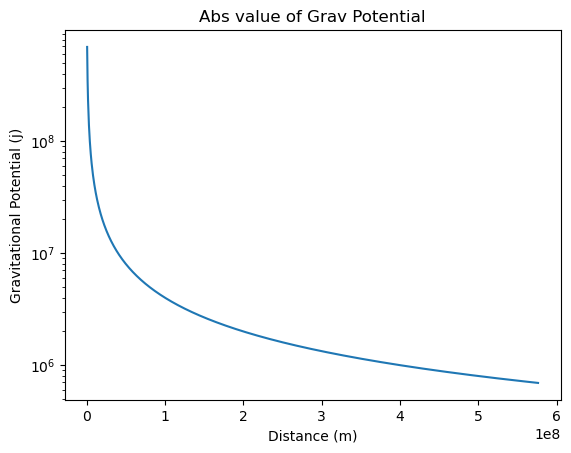

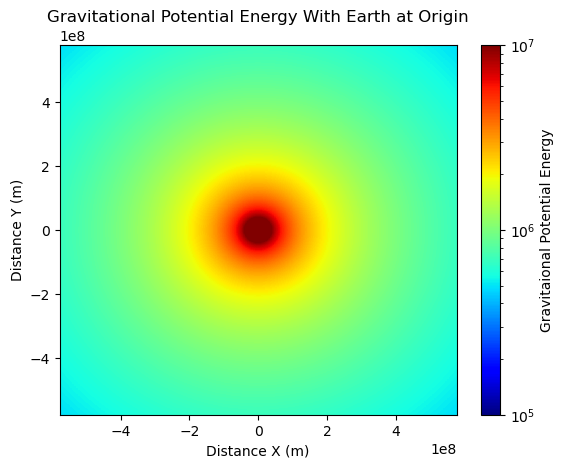

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
from scipy import constants
import matplotlib.colors as colors
#1
M = 5.97*10**24
def U(M,Xe,Ye,x,y):
    if np.isclose(Xe,x) and np.isclose(Ye,y):
        r = np.nan
    else:
        r = np.sqrt((x-Xe)**2+(y-Ye)**2)
    p = -(constants.G*M)/r
    return p
#2
U_v = np.vectorize(U)
x = np.linspace(0,576000000,1000)
y = 0
fig, ax = plt.subplots(1,1)
ax.plot(x, np.abs(U_v(M,0,0,x,0)))
ax.set_title("Abs value of Grav Potential")
ax.set_yscale('log')

ax.set_ylabel('Gravitational Potential (j)')
ax.set_xlabel('Distance (m)')

#3
a = np.linspace(-576000000,576000000, 1000)
b = np.copy(a)

xgrid,ygrid = np.meshgrid(a,b)
fig2,ax2 = plt.subplots(1,1)
mesh = ax2.pcolormesh(xgrid,ygrid,np.abs(U_v(M,0,0,xgrid,ygrid)), norm = colors.LogNorm(vmin = 1e5, vmax = 1e7), cmap= cmap.jet)

ax2.set_title('Gravitational Potential Energy With Earth at Origin')
ax2.set_xlabel("Distance X (m)")
ax2.set_ylabel("Distance Y (m)")

cbar = fig2.colorbar(mesh)
cbar.set_label("Gravitaional Potential Energy")



Part 2

Text(0.5, 1.0, 'Gravitational Potential Energy of Earth-Moon system')

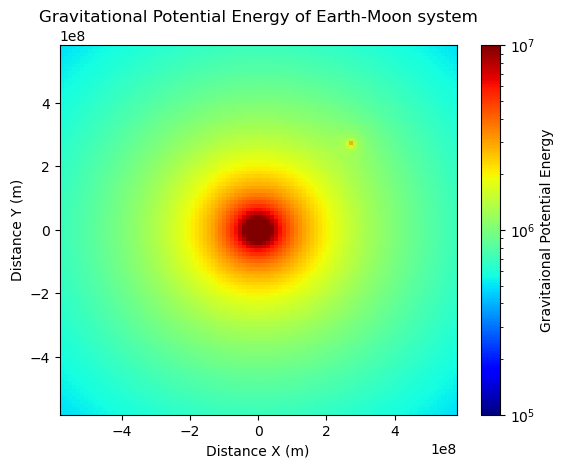

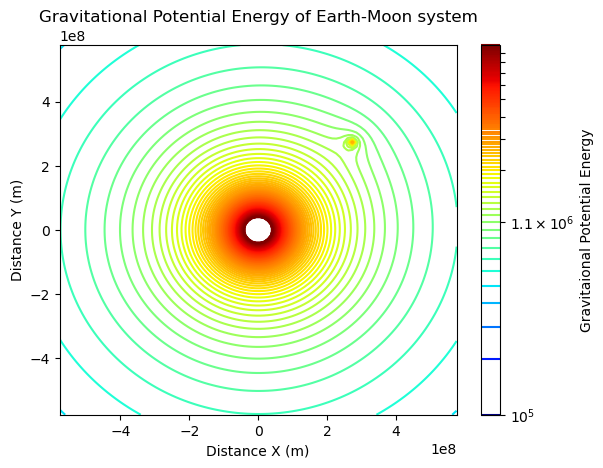

In [76]:
Me = 5.97e24
Mm = 7.35e22
Dem = 3.84e8
Xm = Dem/np.sqrt(2)
Ym=Xm
def Uem(Me,Mm,Xe,Ye,Xm,Ym,x,y):
    if np.isclose(Xe,x)and np.isclose(Ye,y):
        Re=np.nan
    elif np.isclose(Xm,x) and np.isclose(Ym,y):
        Rm = np.nan
    else:
        Re = np.sqrt((x-Xe)**2+(y-Ye)**2)
        Rm = np.sqrt((x-Xm)**2+(y-Ym)**2)
        Uem = -constants.G*(Me/Re +Mm/Rm)

    return Uem

Uem_v = np.vectorize(Uem)
a = np.linspace(-5.76e8,5.76e8, 100)
b = np.copy(a)

xgrid,ygrid = np.meshgrid(a,b)
fig3,ax3 = plt.subplots(1,1)
mesh = ax3.pcolormesh(xgrid,ygrid,np.abs(Uem_v(Me,Mm,0,0,Xm,Ym,xgrid,ygrid)), norm = colors.LogNorm(vmin = 1e5, vmax = 1e7), cmap= cmap.jet)

ax3.set_title("Gravitational Potential Energy of Earth-Moon system")
ax3.set_xlabel("Distance X (m)")
ax3.set_ylabel("Distance Y (m)")

cbar = fig3.colorbar(mesh)
cbar.set_label("Gravitaional Potential Energy")

# part 2
fig4,ax4 = plt.subplots(1,1)
lvl = np.linspace(1E5,1E7,100)
cont=ax4.contour(xgrid,ygrid,np.abs(Uem_v(Me,Mm,0,0,Xm,Ym,xgrid,ygrid)),norm = colors.LogNorm(vmin = 1e5, vmax = 1e7), cmap= cmap.jet, levels = lvl)
ax4.set_xlabel("Distance X (m)")
ax4.set_ylabel("Distance Y (m)")
cbar = fig4.colorbar(cont)
cbar.set_label("Gravitaional Potential Energy")
ax4.set_title("Gravitational Potential Energy of Earth-Moon system")

Part 3

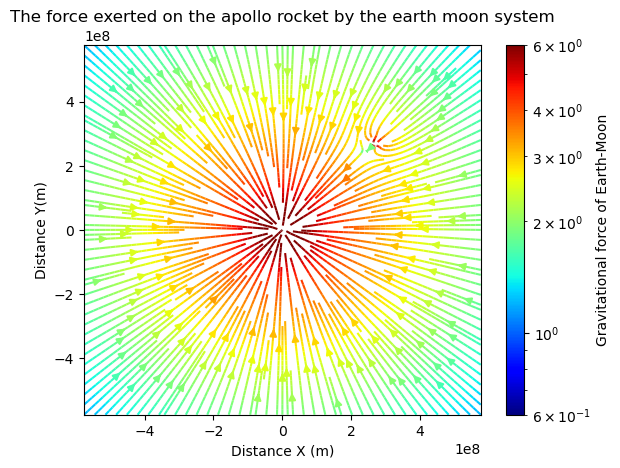

In [78]:
# Part A
def F(M1,m2,x1,y1,x2,y2):
    if np.isclose(x1,x2) and np.isclose(y1,y2):
        fx = np.nan
        fy = np.nan
    else:
        
        r_squared = (x2-x1)**2 + (y2-y1)**2
        vec_r = np.array([x2-x1, y2-y1])
        vec_r_hat = vec_r/np.linalg.norm(vec_r)
    fx = (-constants.G*M1*m2/r_squared)*vec_r_hat[0]
    fy = (-constants.G*M1*m2/r_squared)*vec_r_hat[1]
    return fx,fy

# Part B
import matplotlib.cm as cm
F_v = np.vectorize(F)
Ma = 5500

fig5,ax5 = plt.subplots(1,1)
Fex,Fey = F_v(Me,Ma,0,0,xgrid,ygrid)
Fmx,Fmy = F_v(Mm,Ma,Xm,Ym,xgrid,ygrid)

Fx_t = Fex+Fmx
Fy_t = Fey+Fmy

c = np.log(np.hypot(Fx_t, Fy_t))
norm = colors.LogNorm(vmin = 0.6 , vmax = 6)
stream = ax5.streamplot(xgrid,ygrid,Fx_t,Fy_t, density = 2.5, color = c,norm = norm, cmap = cm.jet)
ax5.set_title('The force exerted on the apollo rocket by the earth moon system')
ax5.set_xlabel('Distance X (m)')
ax5.set_ylabel('Distance Y(m)')
cbar = fig5.colorbar(stream.lines)
cbar.set_label('Gravitational force of Earth-Moon')


Part 4

In [79]:
# Part A
Mo = 2.8e6
Mf = 7.5e5
Br = 1.3e4
Ve = 2.4e3
g = 9.8

T = (Mo-Mf)/Br
# Part B
def V(t,M_wet,M_dry, Br, Ex_s, g):   
    m =M_wet-Br*t
    if m<M_dry:
        m=M_dry

    dv = Ex_s*np.log(M_wet/(m))-g*t
    return dv

#Part C
from scipy.integrate import quad
h = quad(V,0,T,args =(Mo,Mf,Br,Ve,g))[0]


print(f"The height the rocket reaches at burnout {h:.1f} meters")
print(f"The Time before burnout is {T:.1f} seconds")

The height the rocket reaches at burnout 74218.3 meters
The Time before burnout is 157.7 seconds
